# Práctica guiada: Importancia de los features en modelos Ensamble

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier


df = pd.read_csv('car.csv')

le = LabelEncoder()
y = le.fit_transform(df['acceptability'])
X = pd.get_dummies(df.drop('acceptability', axis=1))


In [0]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

rf = RandomForestClassifier(class_weight='balanced', n_jobs=-1)

rf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

El Random forest expone la importancia de los features y lo calcula como la media de la importancia de los features de los árboles base. Vamos a verificar eso.

In [0]:
importancias = rf.feature_importances_
print (all(importancias == np.mean([tree.feature_importances_ for tree in rf.estimators_], axis=0)))

True


Completar los espacios en el código:

In [0]:
# Calcule la desviación estándar de la importacia de los features haciendo un bucle sobre los árboles en el random forest
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)


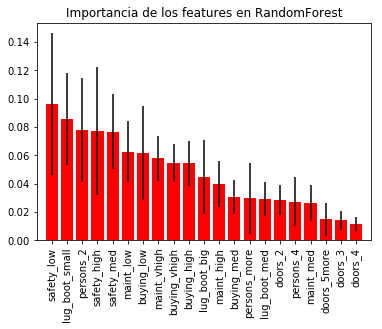

In [0]:
indices = np.argsort(importancias)[::-1]
nombres_features = X.columns

# Graficar la importancia de los features en el random forest
plt.figure()
plt.title("Importancia de los features en RandomForest")
plt.bar(range(X.shape[1]), importancias[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), nombres_features[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

Ahora repitan el proceso para calcular y graficar la importancia de los features en ExtraTrees

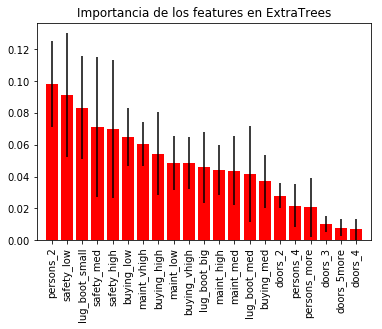

In [0]:
et = ExtraTreesClassifier(class_weight='balanced', n_jobs=-1)

et.fit(X, y)
importancias = et.feature_importances_
std = np.std([tree.feature_importances_ for tree in et.estimators_], axis=0)


indices = np.argsort(importancias)[::-1]
nombres_features = X.columns

# Graficar la importancia de los features
plt.figure()
plt.title("Importancia de los features en ExtraTrees")
plt.bar(range(X.shape[1]), importancias[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), nombres_features[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

Finalmente comparemos los 3 modelos

,imp Extra Trees,imp Random Forest,imp Árbol Decisión
19,0.091411,0.112809,0.155542
12,0.098475,0.107262,0.233312
17,0.083442,0.087222,0.094315
18,0.069903,0.073570,0.033734
7,0.060384,0.070249,0.051254


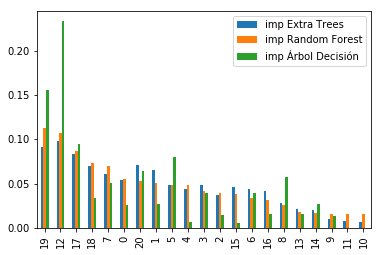

In [0]:
dt2 = DecisionTreeClassifier()
dt2.fit(X, y)
importancias=pd.DataFrame({'imp Árbol Decisión':dt2.feature_importances_,'imp Random Forest':rf.feature_importances_,'imp Extra Trees':et.feature_importances_}).sort_values(['imp Random Forest'], ascending=False)
importancias.plot(kind='bar')
importancias.head()